# 条件：此处针对多分类问题，即分类包括normal, U2R, R2L, Dos, PROBING
    如果是二分类问题，分类应该包括正常、异常
    或者另一种多分类问题就是，23种分类(完整数据集也是有23种分类)
    
    问题1：现在不明确分类中1，2，3，4对应哪一个入侵类型？
    问题2：训练集中的23个类别标签已分类，那么测试集中38个分类标签该如何分类?

## 加载数据和特征

In [29]:
len(set(Features))

14

In [1]:
import pandas as pd
import os
# os.listdir("datafile")

##相关特征##
Features = ['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes','urgent', 'count',
                      'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                      'dst_host_same_src_port_rate', 'label']

# Features=['duration','protocol_type','service','flag','src_bytes','dst_bytes','wrong_fragment',
#           'hot','count','rerror_rate','srv_rerror_rate','srv_diff_host_rate','dst_hosts_count',
#           'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
#           'dst_host_srv_diff_host_rate','dst_host_serror_rate', 'dst_host_srv_serror_rate','label']

# Features_continue = ['duration','src_bytes','dst_bytes','wrong_fragment',  'hot', 'count', 'rerror_rate',
#                      'srv_rerror_rate', 'srv_diff_host_rate', 'dst_hosts_count','dst_host_srv_count',
#                      'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
#                      'dst_host_srv_diff_host_rate','dst_host_serror_rate', 'dst_host_srv_serror_rate']

# Features_discrete = ['protocol_type', 'service', 'flag', 'label']

Features_num = ['duration', 'src_bytes', 'dst_bytes','urgent', 'count',
                  'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                  'dst_host_same_src_port_rate'] 

Features_NonNumerical = ['protocol_type', 'service','label']

##相关类别标签##
labels=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 
        'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
        'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.'] + ['snmpgetattack.', 
        'named.', 'xlock.', 'xsnoop.', 'sendmail.', 'saint.', 'apache2.', 'udpstorm.', 
         'xterm.', 'mscan.', 'processtable.', 'ps.', 'httptunnel.', 'worm.', 'mailbomb.', 'sqlattack.', 'snmpguess.']
labels_Normal = ['normal.']
labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']
labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + ['snmpgetattack.',
                'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

kdd_df = pd.read_csv("./datafile/kddcup.data_10_percent_corrected", names=Features)
# kddTotal_df = pd.read_csv("./datafile/kddcup.data.corrected", names=Features)
kdd_df.shape

(494021, 14)

In [2]:
kdd_df = kdd_df[kdd_df.duplicated()==False].reset_index()

In [3]:
def labelCount(df):
    ##各类别标签统计函数，输出类别总数##
    labels=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 
        'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
        'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.'] + ['snmpgetattack.', 
        'named.', 'xlock.', 'xsnoop.', 'sendmail.', 'saint.', 'apache2.', 'udpstorm.', 
         'xterm.', 'mscan.', 'processtable.', 'ps.', 'httptunnel.', 'worm.', 'mailbomb.', 'sqlattack.', 'snmpguess.']
    labels_Normal = ['normal.']
    labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
    labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']
    labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + ['snmpgetattack.',
                    'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
    labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

    total = df['label'].count()
    totalNormal = df.loc[df['label']=='normal.', 'label'].count()
    totalDos = df.loc[df['label'].isin(labels_Dos), 'label'].count()
    totalProb = df.loc[df['label'].isin(labels_Probing), 'label'].count()
    totalR2L = df.loc[df['label'].isin(labels_R2L), 'label'].count()
    totalU2R = df.loc[df['label'].isin(labels_U2R), 'label'].count()

    print("该数据集总数为：", total, "，其中")
    print("  normal类型总数为：", totalNormal)
    print("  Dos类型总数为：", totalDos)
    print("  Probing类型总数为：", totalProb)
    print("  R2L类型总数为：", totalR2L)
    print("  U2R类型总数为：", totalU2R)
    print(df['label'].unique(), df['label'].nunique())

In [4]:
labelCount(kdd_df)

该数据集总数为： 57178 ，其中
  normal类型总数为： 43956
  Dos类型总数为： 10952
  Probing类型总数为： 1287
  R2L类型总数为： 944
  U2R类型总数为： 39
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.'] 23


In [5]:
##划分训练集和测试集##
from sklearn.model_selection import train_test_split
dev_df, val_df = train_test_split(kdd_df, test_size=0.1,random_state=1)   #随机分配测试集
num1 = dev_df.shape[0]
num2 = dev_df.shape[0]
kdd_df = pd.concat([dev_df, val_df], axis=0)

## 特征工程和数据预处理

In [6]:
labelCount(dev_df)

该数据集总数为： 51460 ，其中
  normal类型总数为： 39552
  Dos类型总数为： 9884
  Probing类型总数为： 1158
  R2L类型总数为： 835
  U2R类型总数为： 31
['normal.' 'teardrop.' 'neptune.' 'warezclient.' 'back.' 'smurf.' 'satan.'
 'imap.' 'portsweep.' 'ipsweep.' 'nmap.' 'pod.' 'buffer_overflow.' 'phf.'
 'warezmaster.' 'guess_passwd.' 'multihop.' 'ftp_write.' 'land.'
 'loadmodule.' 'rootkit.' 'perl.' 'spy.'] 23


In [7]:
labelCount(val_df)

该数据集总数为： 5718 ，其中
  normal类型总数为： 4404
  Dos类型总数为： 1068
  Probing类型总数为： 129
  R2L类型总数为： 109
  U2R类型总数为： 8
['normal.' 'neptune.' 'portsweep.' 'back.' 'smurf.' 'teardrop.'
 'warezclient.' 'ipsweep.' 'satan.' 'nmap.' 'pod.' 'guess_passwd.'
 'warezmaster.' 'rootkit.' 'loadmodule.' 'buffer_overflow.' 'land.'] 17


In [8]:
from sklearn import preprocessing

def FeaturePreprocessing(df):
    ##特征预处理函数，input:DataFrame， output:DataFrame##
    labels=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 
        'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
        'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.'] + ['snmpgetattack.', 
        'named.', 'xlock.', 'xsnoop.', 'sendmail.', 'saint.', 'apache2.', 'udpstorm.', 
         'xterm.', 'mscan.', 'processtable.', 'ps.', 'httptunnel.', 'worm.', 'mailbomb.', 'sqlattack.', 'snmpguess.']
    labels_Normal = ['normal.']
    labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
    labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']
    labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + ['snmpgetattack.',
                    'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
    labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

    df.loc[df['label']=='normal.', 'label'] = 'normal'
    df.loc[df['label'].isin(labels_Dos), 'label'] = 'Dos'
    df.loc[df['label'].isin(labels_Probing), 'label'] = 'Probing'
    df.loc[df['label'].isin(labels_R2L), 'label'] = 'R2L'
    df.loc[df['label'].isin(labels_U2R), 'label'] = 'U2R'
    
    # 编码分类变量，并将数值变量转换为浮点数
    ##此处每将labels进行分类，因此编码时按照23种类别进行分类，而不是5种类别##
    Features_NonNumerical = ['protocol_type', 'service', 'label']
    for col in Features_NonNumerical:
        print(col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df.loc[:,col].values.astype('str')))
        df.loc[:,col] = lbl.transform(list(df.loc[:,col].values.astype('str')))
        
    Features_num = ['duration', 'src_bytes', 'dst_bytes','urgent', 'count',
                  'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                  'dst_host_same_src_port_rate'] 
    for col in Features_num:
        df.loc[:,col] = df.loc[:,col].astype(float)
        
    return df

# # Split the train dataset into development and valid based on time 分割数据集，进而基于时间进行开发和验证
# dev_df = train_df[train_df['date']<=datetime.date(2017,5,31)]
# val_df = train_df[train_df['date']>datetime.date(2017,5,31)]
# dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
# val_y = np.log1p(val_df["totals.transactionRevenue"].values)

# dev_X = dev_df[cat_cols + num_cols] 
# val_X = val_df[cat_cols + num_cols] 
# test_X = test_df[cat_cols + num_cols] 

kdd_df = FeaturePreprocessing(kdd_df)

protocol_type
service
label


## 模型建立与检验
    在lgb.cv()中，得到的是概率，但这是N个n*1的ndarray，此时转化方法如下：
    #概率转化为类别，num_class 为类别的种类
        pre = np.argmax(pre.reshape(num_class, -1),axis=0)

In [9]:
import numpy as np
# dev_df = kdd_df.iloc[0:400000,:]
# val_df = kdd_df.iloc[400000:494021,:]

dev_df = kdd_df.iloc[0:num1,:]
val_df = kdd_df.iloc[num1:num1+num2,:]

# dev_y = np.log1p(dev_df["label"].values)
# val_y = np.log1p(val_df["label"].values)
dev_y = dev_df["label"].values
val_y = val_df["label"].values

dev_X = dev_df[['protocol_type', 'service'] + Features_num] 
val_X = val_df[['protocol_type', 'service'] + Features_num] 

# test_X = kddTotal_df[['protocol_type', 'service', 'flag'] + Features_num] 

In [10]:
import lightgbm as lgb
# custom function to run light gbm model 自定义一个运行gbm模型的函数
def run_lgb(train_X, train_y, val_X, val_y):
    params = {
#         'task': 'train',
#         'boosting_type': 'gbdt',
#         'objective': 'binary',
#         'metric': {'l2', 'auc'},
#         'num_leaves': 31,
#         'learning_rate': 0.05,
#         'feature_fraction': 0.9,
#         'bagging_fraction': 0.8,
#         'bagging_freq': 5,
#         'verbose': 0
        "objective" : "multiclass",
        "num_class" : 5,
        "learning_rate":0.1,
        "lambda_l1":0.1,
        "lambda_l2":0.2,
        "max_depth":4,
    }

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
#     pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

# Training the model #
# pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)
model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's multi_logloss: 0.0520005
[200]	valid_0's multi_logloss: 0.0384208
[300]	valid_0's multi_logloss: 0.0352389
[400]	valid_0's multi_logloss: 0.0349494
Early stopping, best iteration is:
[394]	valid_0's multi_logloss: 0.0348517


### 实验分组和测评方式
    1、四组（每组包括已知入侵和未知入侵）————因此进行训练时可以分为19个已知入侵，3个未知入侵
    2、同一组内不同类别标签的识别率；不同组间的相同类别标签的识别率；
    3、性能比较：此模型方法和其他模型方法之间的性能比较（检测率和误报率————统计检测率的均值方差和误报率的均值方差）
    4、不同方法之间检测时，要严格控制测试数据集一致。
    3、测评方式：一般是检测率和误报率

## 模型检验与评估
以下为10%数据集的检验和特征重要性分析

## 机器学习多分类评估方法
    宏平均、微平均
    更注重样本量多的class，使用宏平均；更注重样本量少的class，使用微平均

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def modelCheck(pred_val, df):
    ##模型检验函数，input:模型预测分类和实际分类，output：混淆矩阵（图），分类报告##
    prediction_val=[]
    for x in pred_val:
        prediction_val.append(np.argmax(x))

    cm = confusion_matrix(df['label'], prediction_val)   #Ci,j表示实际类别为i但是预测为类别j的观测数量
    # tn, fp, fn, tp = np.ravel(cm)   #此处结果只针对二分类问题
    print(cm)
    
    ##检测率：指测试集中攻击样本被正确识别为攻击的比例
    ##精确率：指测试集中所有被IDS识别为攻击样本中，真正为攻击样本的比值；
    ##混淆矩阵中，横向为预测的分类标签，纵向为实际的分类标签
    detection_Rate = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/(cm.sum())
    detectionNormal_Rate = cm[0,0] / cm[:,0].sum()    # normal检测率
    detectionDos_Rate = cm[1,1] / cm[:,1].sum()   # Dos检测率
    detectionProbing_Rate = cm[2,2] / cm[:,2].sum()   # Probing检测率
    detectionU2R_Rate = cm[3,3] / cm[:,3].sum()   # U2R检测率
    detectionR2L_Rate = cm[4,4] / cm[:,4].sum()   # R2L检测率
    
    print("总体识别率为：", detection_Rate)
    print("normal识别率为", detectionNormal_Rate)
    print("Dos识别率", detectionDos_Rate)    
    print("Probing识别率", detectionProbing_Rate)
    print("R2L识别率", detectionR2L_Rate)
    print("U2R识别率", detectionU2R_Rate)

    # detection_Rate = tp / (tp + fn)    #检测率：99.76%
    # falseAlarm_Rate = fp / (fp + tn)   #误报率：0.1996%
    # print("检测率为：", detection_Rate)
    # print("误报率为：", falseAlarm_Rate)
    
    # 可视化矩阵图
    plt.matshow(cm,cmap=plt.cm.Greens)
    plt.show()
    
    ##多分类评估热点图##
    cm_df = pd.DataFrame(cm)
    sns.heatmap(cm_df, annot=True)

    ##查看多分类的评估报告##
    print(classification_report(df['label'], prediction_val))   #精确率和召回率，f1-score，支持数support
    
modelCheck(pred_val, val_df)

[[1045    0    1    2   20]
 [   2  122    3    0    2]
 [   1    1  104    0    3]
 [   3    0    1    2    2]
 [  25    2    6    0 4371]]
总体识别率为： 0.987058412032179
normal识别率为 0.9784644194756554
Dos识别率 0.9457364341085271
Probing识别率 0.9541284403669725
R2L识别率 0.9925068119891008
U2R识别率 0.25


<Figure size 480x480 with 1 Axes>

             precision    recall  f1-score   support

          0       0.97      0.98      0.97      1068
          1       0.98      0.95      0.96       129
          2       0.90      0.95      0.93       109
          3       0.50      0.25      0.33         8
          4       0.99      0.99      0.99      4404

avg / total       0.99      0.99      0.99      5718



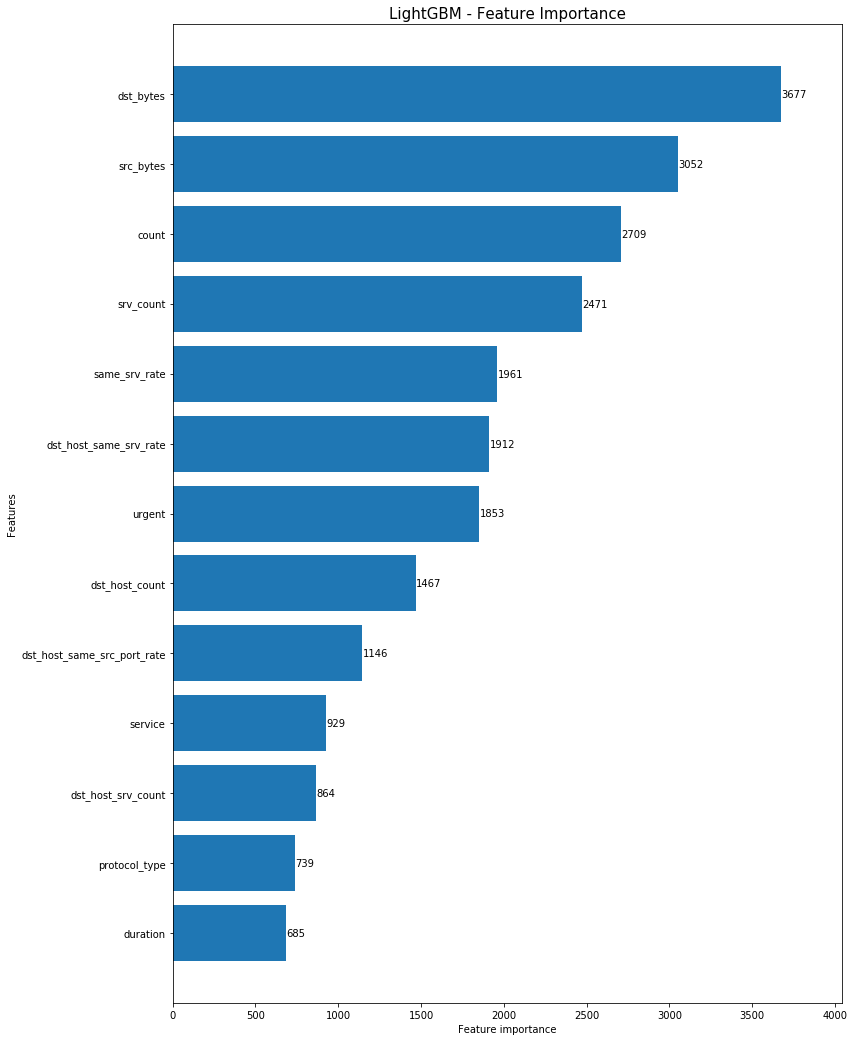

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

### 以下为完整数据集（4898431行数据，42列特征）的验证和检测率分析

In [14]:
Features=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
         'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
          'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
         'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
          'diff_srv_rate','srv_diff_host_rate',
         'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
          'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
          'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate', 
         'label']kddTotal_df = pd.read_csv("./datafile/kddcup.data.corrected", names=Features)


In [15]:
kddTotal_df.shape

(4898431, 42)

In [16]:
kddTotal_df = FeaturePreprocessing(kddTotal_df)

protocol_type
service
flag
label


In [18]:
test_X = kddTotal_df[['protocol_type', 'service', 'flag'] + Features_num] 
pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)


[[3883358       1       1       0      10]
 [      4   40934       7       1     156]
 [      0       0    1121       0       5]
 [      0       0       2      42       8]
 [     48      52     105      32  972544]]
总体识别率为： 0.9999118084954142
normal识别率为 0.9999969099004216
Dos识别率 0.9959126076589947
Probing识别率 0.9955595026642984
R2L识别率 0.9997563685968374
U2R识别率 0.8076923076923077


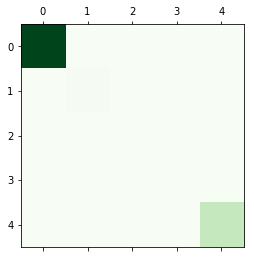

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   3883370
          1       1.00      1.00      1.00     41102
          2       0.91      1.00      0.95      1126
          3       0.56      0.81      0.66        52
          4       1.00      1.00      1.00    972781

avg / total       1.00      1.00      1.00   4898431



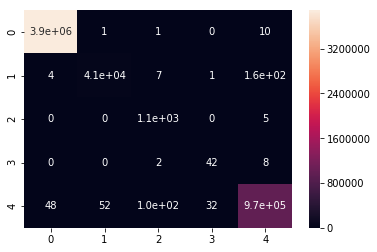

In [19]:
modelCheck(pred_test_y, kddTotal_df)

## 测试集分为四组
    1、来自训练集：28000正常+2000异常；
    2、来自训练集：28000正常+2000异常；
    3、除去训练集之后的部分：28000正常+2000异常;
    4、除去训练集之后的部分：28000正常+2000异常;
    5、训练集中有23种标签，其中有两种['spy.', 'warezclient.']没有出现在测试集中；
    6、测试集中有38种标签，有21种（包括normal）与训练集一样，有17种是未知入侵；

In [13]:
##加载含标签测试数据##
import pandas as pd
Features = ['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes','urgent', 'count',
                      'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                      'dst_host_same_src_port_rate', 'label']

testFromTrain_df = pd.read_csv("./datafile/kddcup.data_10_percent_corrected", names=Features)
testLabeled_df = pd.read_csv("./datafile/corrected", names=Features)

##划分测试集##
from sklearn.cross_validation import train_test_split
first_test, second_test = train_test_split(testFromTrain_df, test_size=0.5, random_state=1)   #从训练集中随机分配测试集
third_test, forth_test = train_test_split(testLabeled_df, test_size=0.5, random_state=1)   #从测试集中随机分配测试集

# ##区分已知入侵和未知入侵##
# labels=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 
#         'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
#         'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.']
# testKonwIntrusion_df = testLabeled_df.loc[testLabeled_df['label'].isin(labels), :]
# testUnkonwIntrusion_df = testLabeled_df.loc[~testLabeled_df['label'].isin(labels), :]

/home/huge/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
labels=['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 
        'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.',
        'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.'] + ['snmpgetattack.', 
        'named.', 'xlock.', 'xsnoop.', 'sendmail.', 'saint.', 'apache2.', 'udpstorm.', 
         'xterm.', 'mscan.', 'processtable.', 'ps.', 'httptunnel.', 'worm.', 'mailbomb.', 'sqlattack.', 'snmpguess.']
labels_Normal = ['normal.']
labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']
labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + ['snmpgetattack.',
                'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']


labels_Probing1 = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.']
labels_Probing2 = ['mscan.', 'saint.']
labels_U2R1 = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.']
labels_U2R2 = ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

print(forth_test.loc[forth_test['label'].isin(labels_U2R1), 'label'].count())
print(forth_test.loc[forth_test['label'].isin(labels_U2R2), 'label'].count())

20
85


In [15]:
print(labelCount(first_test))
print(labelCount(second_test))
print(labelCount(third_test))
print(labelCount(forth_test))

该数据集总数为： 247010 ，其中
  normal类型总数为： 48704
  Dos类型总数为： 195642
  Probing类型总数为： 2080
  R2L类型总数为： 553
  U2R类型总数为： 31
['neptune.' 'smurf.' 'normal.' 'ipsweep.' 'warezmaster.' 'teardrop.'
 'satan.' 'back.' 'warezclient.' 'nmap.' 'portsweep.' 'pod.' 'perl.'
 'guess_passwd.' 'land.' 'buffer_overflow.' 'imap.' 'phf.' 'multihop.'
 'rootkit.' 'loadmodule.' 'ftp_write.' 'spy.'] 23
None
该数据集总数为： 247011 ，其中
  normal类型总数为： 48574
  Dos类型总数为： 195816
  Probing类型总数为： 2027
  R2L类型总数为： 573
  U2R类型总数为： 21
['smurf.' 'neptune.' 'normal.' 'ipsweep.' 'satan.' 'nmap.' 'back.'
 'warezclient.' 'teardrop.' 'portsweep.' 'pod.' 'guess_passwd.' 'imap.'
 'loadmodule.' 'ftp_write.' 'land.' 'rootkit.' 'warezmaster.'
 'buffer_overflow.' 'perl.' 'multihop.' 'phf.' 'spy.'] 23
None
该数据集总数为： 155514 ，其中
  normal类型总数为： 30490
  Dos类型总数为： 114743
  Probing类型总数为： 2054
  R2L类型总数为： 8104
  U2R类型总数为： 123
['neptune.' 'normal.' 'smurf.' 'snmpgetattack.' 'satan.' 'mailbomb.'
 'guess_passwd.' 'snmpguess.' 'back.' 'processtable.' 'mscan.' 'n

/home/huge/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
/home/huge/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


protocol_type
service
label
[[195365      0      7      4    266]
 [    21   2045      6      0      8]
 [     0      0    537      0     16]
 [     2      0      8     18      3]
 [   137      1    101     13  48452]]
总体识别率为： 0.9975992874782398
normal识别率为 0.9985841485979493
Dos识别率 0.9831730769230769
Probing识别率 0.9710669077757685
R2L识别率 0.9948258869908015
U2R识别率 0.5806451612903226


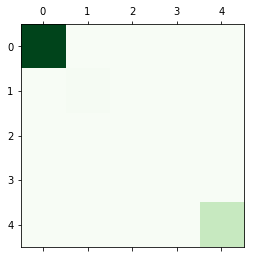

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    195642
          1       1.00      0.98      0.99      2080
          2       0.81      0.97      0.89       553
          3       0.51      0.58      0.55        31
          4       0.99      0.99      0.99     48704

avg / total       1.00      1.00      1.00    247010



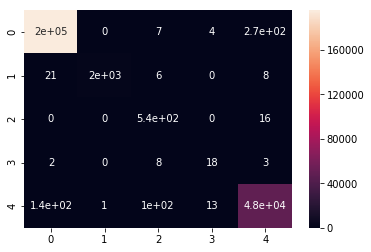

In [16]:
##第一组测试##
first_test = FeaturePreprocessing(first_test)
test_X = first_test[['protocol_type', 'service'] + Features_num] 
pred_test1_y = model.predict(test_X, num_iteration=model.best_iteration)
modelCheck(pred_test1_y, first_test)

/home/huge/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
/home/huge/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


protocol_type
service
label
[[195546      0      6      0    264]
 [    19   1991     10      0      7]
 [     1      1    560      1     10]
 [     4      0      5      9      3]
 [   151      1    107     17  48298]]
总体识别率为： 0.9975426195594528
normal识别率为 0.9986211545532541
Dos识别率 0.9822397631968426
Probing识别率 0.9773123909249564
R2L识别率 0.9943179478733479
U2R识别率 0.42857142857142855


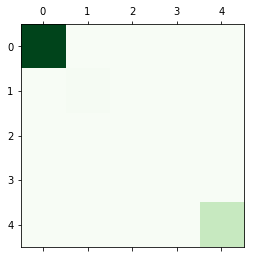

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    195816
          1       1.00      0.98      0.99      2027
          2       0.81      0.98      0.89       573
          3       0.33      0.43      0.38        21
          4       0.99      0.99      0.99     48574

avg / total       1.00      1.00      1.00    247011



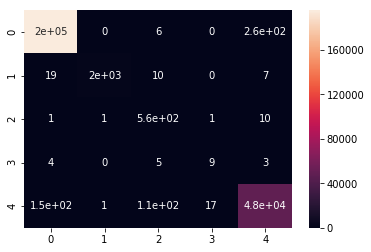

In [25]:
##第二组测试##
second_test = FeaturePreprocessing(second_test)
test_X = second_test[['protocol_type', 'service'] + Features_num] 
pred_test2_y = model.predict(test_X, num_iteration=model.best_iteration)
modelCheck(pred_test2_y, second_test)

/home/huge/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
/home/huge/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


protocol_type
service
label
[[110894     14      6      0   3829]
 [    86   1354      0      2    612]
 [     9      9    593      4   7489]
 [     1      4      2      3    113]
 [   147     85     87     11  30160]]
总体识别率为： 0.9195570816775338
normal识别率为 0.9664554700504606
Dos识别率 0.6592015579357352
Probing识别率 0.07317374136229023
R2L识别率 0.9891767792718924
U2R识别率 0.024390243902439025


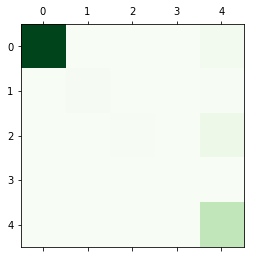

             precision    recall  f1-score   support

          0       1.00      0.97      0.98    114743
          1       0.92      0.66      0.77      2054
          2       0.86      0.07      0.13      8104
          3       0.15      0.02      0.04       123
          4       0.71      0.99      0.83     30490

avg / total       0.93      0.92      0.90    155514



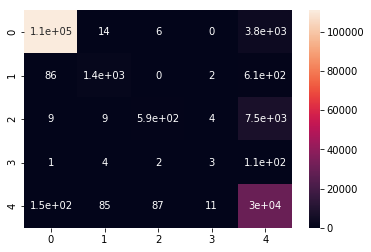

In [26]:
##第三组测试##
third_test = FeaturePreprocessing(third_test)
test_X = third_test[['protocol_type', 'service'] + Features_num] 
pred_test3_y = model.predict(test_X, num_iteration=model.best_iteration)
modelCheck(pred_test3_y, third_test)

/home/huge/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
/home/huge/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


protocol_type
service
label
[[111388      5      6      0   3711]
 [    95   1376      3      0    638]
 [     9     15    554      6   7501]
 [     1      1      5      1     97]
 [   131     73     63      8  29828]]
总体识别率为： 0.9204706941452593
normal识别率为 0.967665711058987
Dos识别率 0.6515151515151515
Probing识别率 0.06852195423623995
R2L识别率 0.9908646978706441
U2R识别率 0.009523809523809525


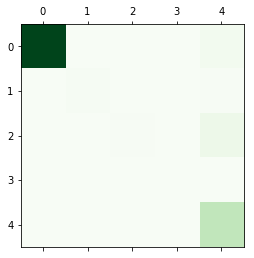

             precision    recall  f1-score   support

          0       1.00      0.97      0.98    115110
          1       0.94      0.65      0.77      2112
          2       0.88      0.07      0.13      8085
          3       0.07      0.01      0.02       105
          4       0.71      0.99      0.83     30103

avg / total       0.94      0.92      0.90    155515



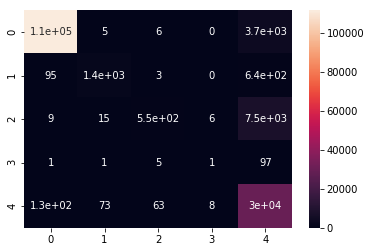

In [27]:
##第四组测试##
forth_test = FeaturePreprocessing(forth_test)
test_X = forth_test[['protocol_type', 'service'] + Features_num] 
pred_test4_y = model.predict(test_X, num_iteration=model.best_iteration)
modelCheck(pred_test4_y, forth_test)

### 此处需要区分已知入侵和未知入侵？？？
testLabeled_df

In [47]:
FeaturePreprocession()
##归类类别标签##
labels_Normal = ['normal.']
labels_Dos = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] + ['apache2.', 'mailbomb.', 'processtable.', 'udpstorm.']
labels_Probing = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] + ['mscan.', 'saint.']
labels_R2L = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] + [
                'named.', 'sendmail.', 'snmpgeattack.', 'snmpguess.', 'worm.', 'xlock.', 'xsnoop.']
labels_U2R = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] + ['httptunnel.', 'ps.', 'sqlattack.', 'xterm.']

testLabeled_df.loc[testLabeled_df['label']=='normal.', 'label'] = 'normal'
testLabeled_df.loc[testLabeled_df['label'].isin(labels_Dos), 'label'] = 'Dos'
testLabeled_df.loc[testLabeled_df['label'].isin(labels_Probing), 'label'] = 'Probing'
testLabeled_df.loc[testLabeled_df['label'].isin(labels_R2L), 'label'] = 'R2L'
testLabeled_df.loc[testLabeled_df['label'].isin(labels_U2R), 'label'] = 'U2R'

##特征编码和数值化##
Features_NonNumerical = ['protocol_type', 'service', 'flag', 'label']
for col in Features_NonNumerical:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(testLabeled_df[col].values.astype('str')))
    testLabeled_df[col] = lbl.transform(list(testLabeled_df[col].values.astype('str')))

Features_num = ['duration', 'src_bytes','dst_bytes','land','wrong_fragment','urgent',
                 'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
                  'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
                 'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
                  'diff_srv_rate','srv_diff_host_rate',
                 'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
                  'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
                  'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate' ]    
for col in Features_num:
    testLabeled_df[col] = testLabeled_df[col].astype(float)

##预测##
predLabeled_test = model.predict(testLabeled_df, num_iteration=model.best_iteration)

protocol_type
service
flag
label


In [49]:
testLabeled_df['service'].nunique()

65

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     74833
          1       1.00      0.96      0.98       310
          2       0.00      0.00      0.00         1
          3       0.90      0.60      0.72        15
          4       0.99      1.00      0.99     18862

avg / total       1.00      1.00      1.00     94021



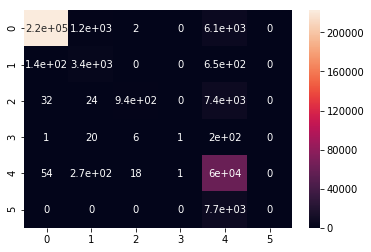

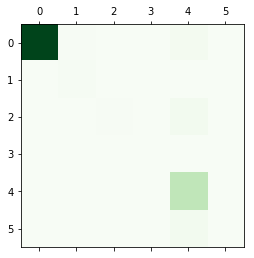

In [42]:
predictionTest_val=[]
for x in predLabeled_test:
    predictionTest_val.append(np.argmax(x))

##多分类评估热点图##
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testLabeled_df['label'], predictionTest_val)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True)

##查看多分类的评估报告##
from sklearn.metrics import classification_report
print(classification_report(val_df['label'], prediction_val))   #精确率和召回率，f1-score，支持数support

import matplotlib.pyplot as plt   #导入作图函数
plt.matshow(cm,cmap=plt.cm.Greens)   #矩阵图可视化

In [19]:
# ##加载不含标签的测试集##
# import pandas as pd

# Features_nolabeled=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
#                      'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
#                       'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
#                      'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
#                       'diff_srv_rate','srv_diff_host_rate',
#                      'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
#                       'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
#                       'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate']

# test_df = pd.read_csv("./datafile/kddcup.newtestdata_10_percent_unlabeled", names=Features_nolabeled)


# Features_NonNumerical = ['protocol_type', 'service', 'flag']
# for col in Features_NonNumerical:
#     print(col)
#     lbl = preprocessing.LabelEncoder()
#     lbl.fit(list(test_df[col].values.astype('str')))
#     test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

# Features_num = ['duration', 'src_bytes','dst_bytes','land','wrong_fragment','urgent',
#                  'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
#                   'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_hot_login','is_guest_login',
#                  'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
#                   'diff_srv_rate','srv_diff_host_rate',
#                  'dst_hosts_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
#                   'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
#                   'dst_host_srv_serror_rate','dst_host_rerror_rate','st_host_srv_rerror_rate' ]    
# for col in Features_num:
#     test_df[col] = test_df[col].astype(float)

# pred_test = model.predict(test_df, num_iteration=model.best_iteration)